In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('data.csv')

In [28]:
print(df.shape)
n = df.shape[0]
df.sample(5)

(818238, 35)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
357628,457628,117.432,13.372,89.989,90.982,5.649,928.746,-7.898,2.640,1.212,...,-2.539,1.618,45.436,3.110,0.360,112.378,0.000461,s,v,0.000840
581596,681596,120.594,12.634,70.556,57.093,-999.000,-999.000,-999.000,3.040,25.954,...,0.701,-1.742,-999.000,-999.000,-999.000,31.150,0.005721,s,v,0.010415
602992,702992,-999.000,80.704,69.570,20.161,-999.000,-999.000,-999.000,2.612,20.161,...,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,1.451235,b,v,2.638678
620075,720075,409.443,173.631,147.250,136.015,-999.000,-999.000,-999.000,2.683,71.172,...,0.169,-0.839,-999.000,-999.000,-999.000,84.674,0.226870,b,v,0.412502
150770,250770,134.719,8.733,80.814,57.495,2.715,190.748,0.472,2.972,22.757,...,2.879,-0.150,40.690,0.164,2.244,127.727,0.000814,s,t,0.002653


In [29]:
df['Label'] = np.where(df['Label']=='s', 1, 0)
df = df.drop(columns=["KaggleSet", "EventId", 'Weight', 'KaggleWeight'])

In [30]:
df.sample(5)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
109482,97.212,5.112,71.286,114.585,1.367,87.728,1.591,1.621,2.171,200.954,...,207.410,2,57.623,0.751,-1.736,56.006,2.118,-1.443,113.630,0
284528,121.670,43.616,82.893,62.181,3.638,276.522,-2.156,2.872,60.158,212.144,...,309.535,3,45.184,-0.746,0.342,41.971,2.892,-2.552,128.059,1
570421,122.573,29.354,93.181,6.150,-999.000,-999.000,-999.000,2.888,6.150,81.205,...,148.801,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,1
678917,80.526,13.079,57.228,25.099,-999.000,-999.000,-999.000,2.525,10.382,93.772,...,157.314,1,34.549,-0.861,-1.844,-999.000,-999.000,-999.000,34.549,0
706610,75.465,49.121,40.455,115.988,1.820,161.497,-0.780,1.326,35.031,187.822,...,356.807,2,64.625,-1.128,-1.375,60.312,0.691,-3.071,124.937,0


In [31]:
columns_to_remove = []
for column in df.columns:
    n_invalid = np.count_nonzero(df[column] == -999.0)
    rate_invalid = n_invalid / df.shape[0]
    print("{} - percentage of missing values : {} %".format(column, 100*rate_invalid))
    if rate_invalid >= 0.4:
        print("\tRemoving {}".format(column))
        columns_to_remove.append(column)

DER_mass_MMC - percentage of missing values : 15.228087671313236 %
DER_mass_transverse_met_lep - percentage of missing values : 0.0 %
DER_mass_vis - percentage of missing values : 0.0 %
DER_pt_h - percentage of missing values : 0.0 %
DER_deltaeta_jet_jet - percentage of missing values : 70.91494161845331 %
	Removing DER_deltaeta_jet_jet
DER_mass_jet_jet - percentage of missing values : 70.91494161845331 %
	Removing DER_mass_jet_jet
DER_prodeta_jet_jet - percentage of missing values : 70.91494161845331 %
	Removing DER_prodeta_jet_jet
DER_deltar_tau_lep - percentage of missing values : 0.0 %
DER_pt_tot - percentage of missing values : 0.0 %
DER_sum_pt - percentage of missing values : 0.0 %
DER_pt_ratio_lep_tau - percentage of missing values : 0.0 %
DER_met_phi_centrality - percentage of missing values : 0.0 %
DER_lep_eta_centrality - percentage of missing values : 70.91494161845331 %
	Removing DER_lep_eta_centrality
PRI_tau_pt - percentage of missing values : 0.0 %
PRI_tau_eta - percenta

In [32]:
new_df = df.drop(columns=columns_to_remove)

In [33]:
print(new_df.shape, len(columns_to_remove))

(818238, 21) 10


In [34]:
new_df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt', 'Label'],
      dtype='object')

In [35]:
seriesObj = new_df.apply(lambda x: -999.0 in list(x), axis=1)
numOfRows = len(seriesObj[seriesObj == False].index)
print("nombre et fréquence de lignes complètes (sans -999) : {} {}".format(numOfRows, numOfRows/n))

nombre et fréquence de lignes complètes (sans -999) : 693636 0.8477191232868676


In [36]:
new_df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num',
       'PRI_jet_all_pt', 'Label'],
      dtype='object')

In [37]:
print(new_df.shape)
new_df = new_df[seriesObj == False]
print(new_df.shape)

(818238, 21)
(693636, 21)


In [39]:
np.count_nonzero(new_df["Label"] == 1) / len(new_df)

0.3897880156162598

In [40]:
np.count_nonzero(new_df["Label"] == 0) / len(new_df)

0.6102119843837401

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8225f8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8875f8>], dtype=object)

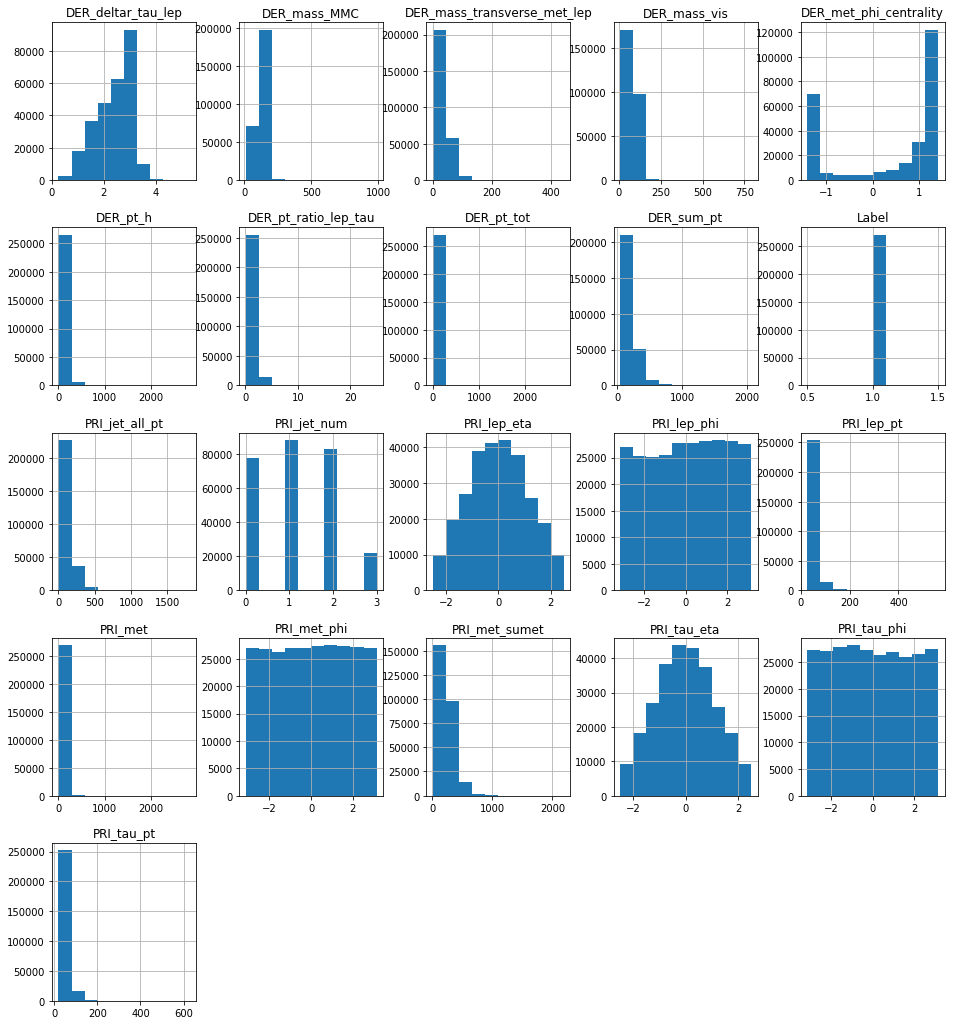

In [44]:
new_df[new_df["Label"] == 1].hist(figsize = (16,18))[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20652cf8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1a206bb358>], dtype=object)

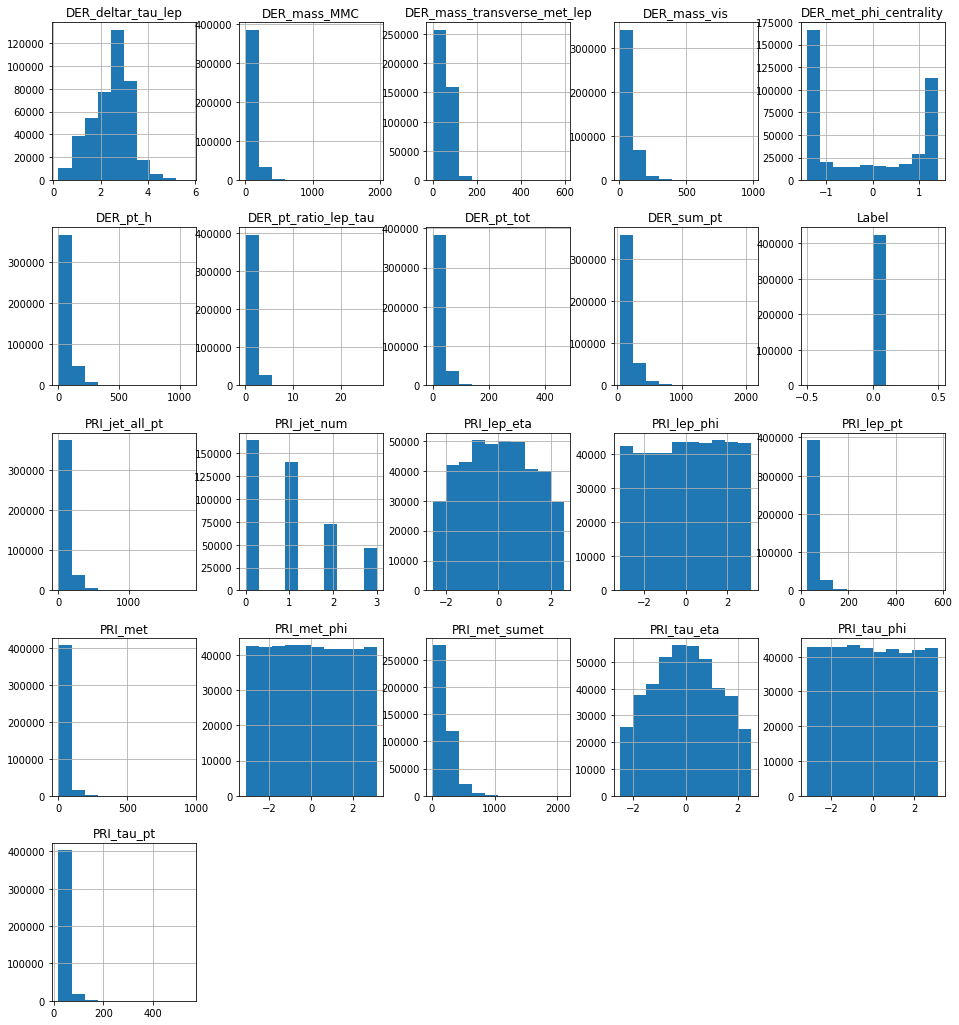

In [45]:
new_df[new_df["Label"] == 0].hist(figsize = (16,18))[1]